In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2_contingency, chi2

In [86]:
df = pd.read_csv("../data/train_data.csv", sep=";")
df.shape

(2152, 16)

In [87]:
# print all head columns
columns =  df.columns
for col in columns:
    print(col)

id_colaborador
id_ultimo_jefe
seniority
modalidad_trabajo
distancia_oficina
dias_baja_salud
genero
canal_reclutamiento
permanencia_promedio
fecha_nacimiento
salario
performance_score
psi_score
fecha_incorporacion
estado_civil
abandono_6meses


In [88]:
df["genero"] = df["genero"].replace("Mujer", 1).replace("Hombre", 0)
df["modalidad_trabajo"] = df["modalidad_trabajo"].replace("Presencial", 0).replace("Híbrida", 1)
df["fecha_nacimiento"] = pd.to_datetime(df["fecha_nacimiento"]).dt.year
df["fecha_incorporacion"] = pd.to_datetime(df["fecha_incorporacion"]).dt.year
df["estado_civil"] = df["estado_civil"].replace("Casado", 1).replace("Soltero", 0).replace("Divorciado", 2).replace("Viudo", 3)
df["canal_reclutamiento"] = df["canal_reclutamiento"].replace("Portal Web", 0).replace("Linkedin", 1).replace("Referidos", 2).replace("Ferias & Networking", 3).replace("Headhunter", 4)

# change all nan values to 0
df = df.fillna(0)

/tmp/ipykernel_37799/3110470828.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["fecha_nacimiento"] = pd.to_datetime(df["fecha_nacimiento"]).dt.year
/tmp/ipykernel_37799/3110470828.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["fecha_incorporacion"] = pd.to_datetime(df["fecha_incorporacion"]).dt.year


In [89]:
print(df["fecha_nacimiento"].value_counts())

fecha_nacimiento
1976    82
1974    81
1975    77
1969    77
1970    73
1978    72
1980    70
1977    69
1985    67
1967    67
1971    66
1983    66
1968    63
1979    63
2001    61
1984    60
1972    59
1973    59
1988    59
1999    56
1981    56
1994    56
1997    53
1993    51
1986    51
1996    50
1982    50
1989    47
2000    47
1990    47
1991    42
1995    42
1987    40
1992    35
1998    35
2002    23
1964    19
1966    18
1963    13
1965     8
1962     7
1961     6
2003     3
1960     3
1957     2
1959     1
Name: count, dtype: int64


In [90]:
for col in range(2,len(columns)):
    print(df[columns[col]].value_counts())

seniority
1    2061
2      91
Name: count, dtype: int64
modalidad_trabajo
0    1530
1     622
Name: count, dtype: int64
distancia_oficina
1.985    9
1.940    9
2.830    9
2.500    9
1.580    8
        ..
5.335    1
0.875    1
3.545    1
6.205    1
6.350    1
Name: count, Length: 931, dtype: int64
dias_baja_salud
1     605
2     592
3     307
0     240
8      65
5      64
6      63
7      51
9      50
4      42
10     25
12     15
11     15
13      7
14      5
35      2
34      2
18      1
15      1
Name: count, dtype: int64
genero
0    1095
1    1057
Name: count, dtype: int64
canal_reclutamiento
0    986
1    488
2    338
3    308
4     32
Name: count, dtype: int64
permanencia_promedio
4     245
5     233
3     221
6     185
7     175
2     173
1     170
8     134
9     123
10     84
11     82
12     71
13     66
14     53
16     48
15     43
18     18
17     14
19      5
20      3
25      2
21      2
22      1
24      1
Name: count, dtype: int64
fecha_nacimiento
1976    82
1974    81


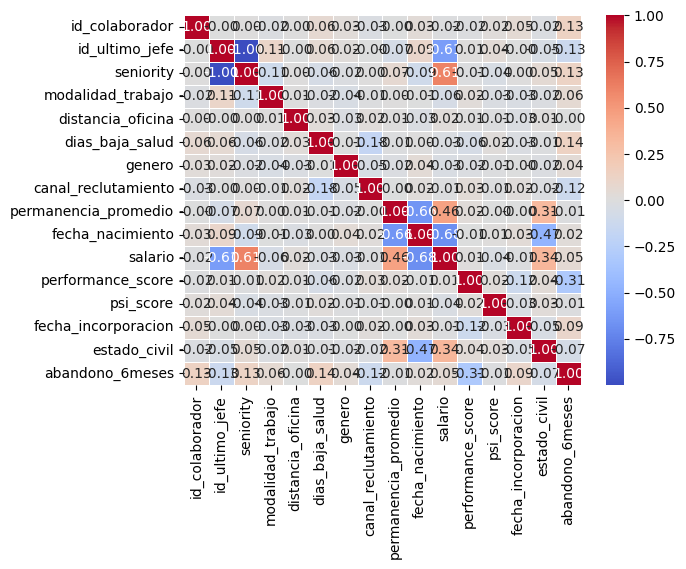

In [91]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f" , linewidths=.5)
plt.show()


/home/marcos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/marcos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/marcos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/marcos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


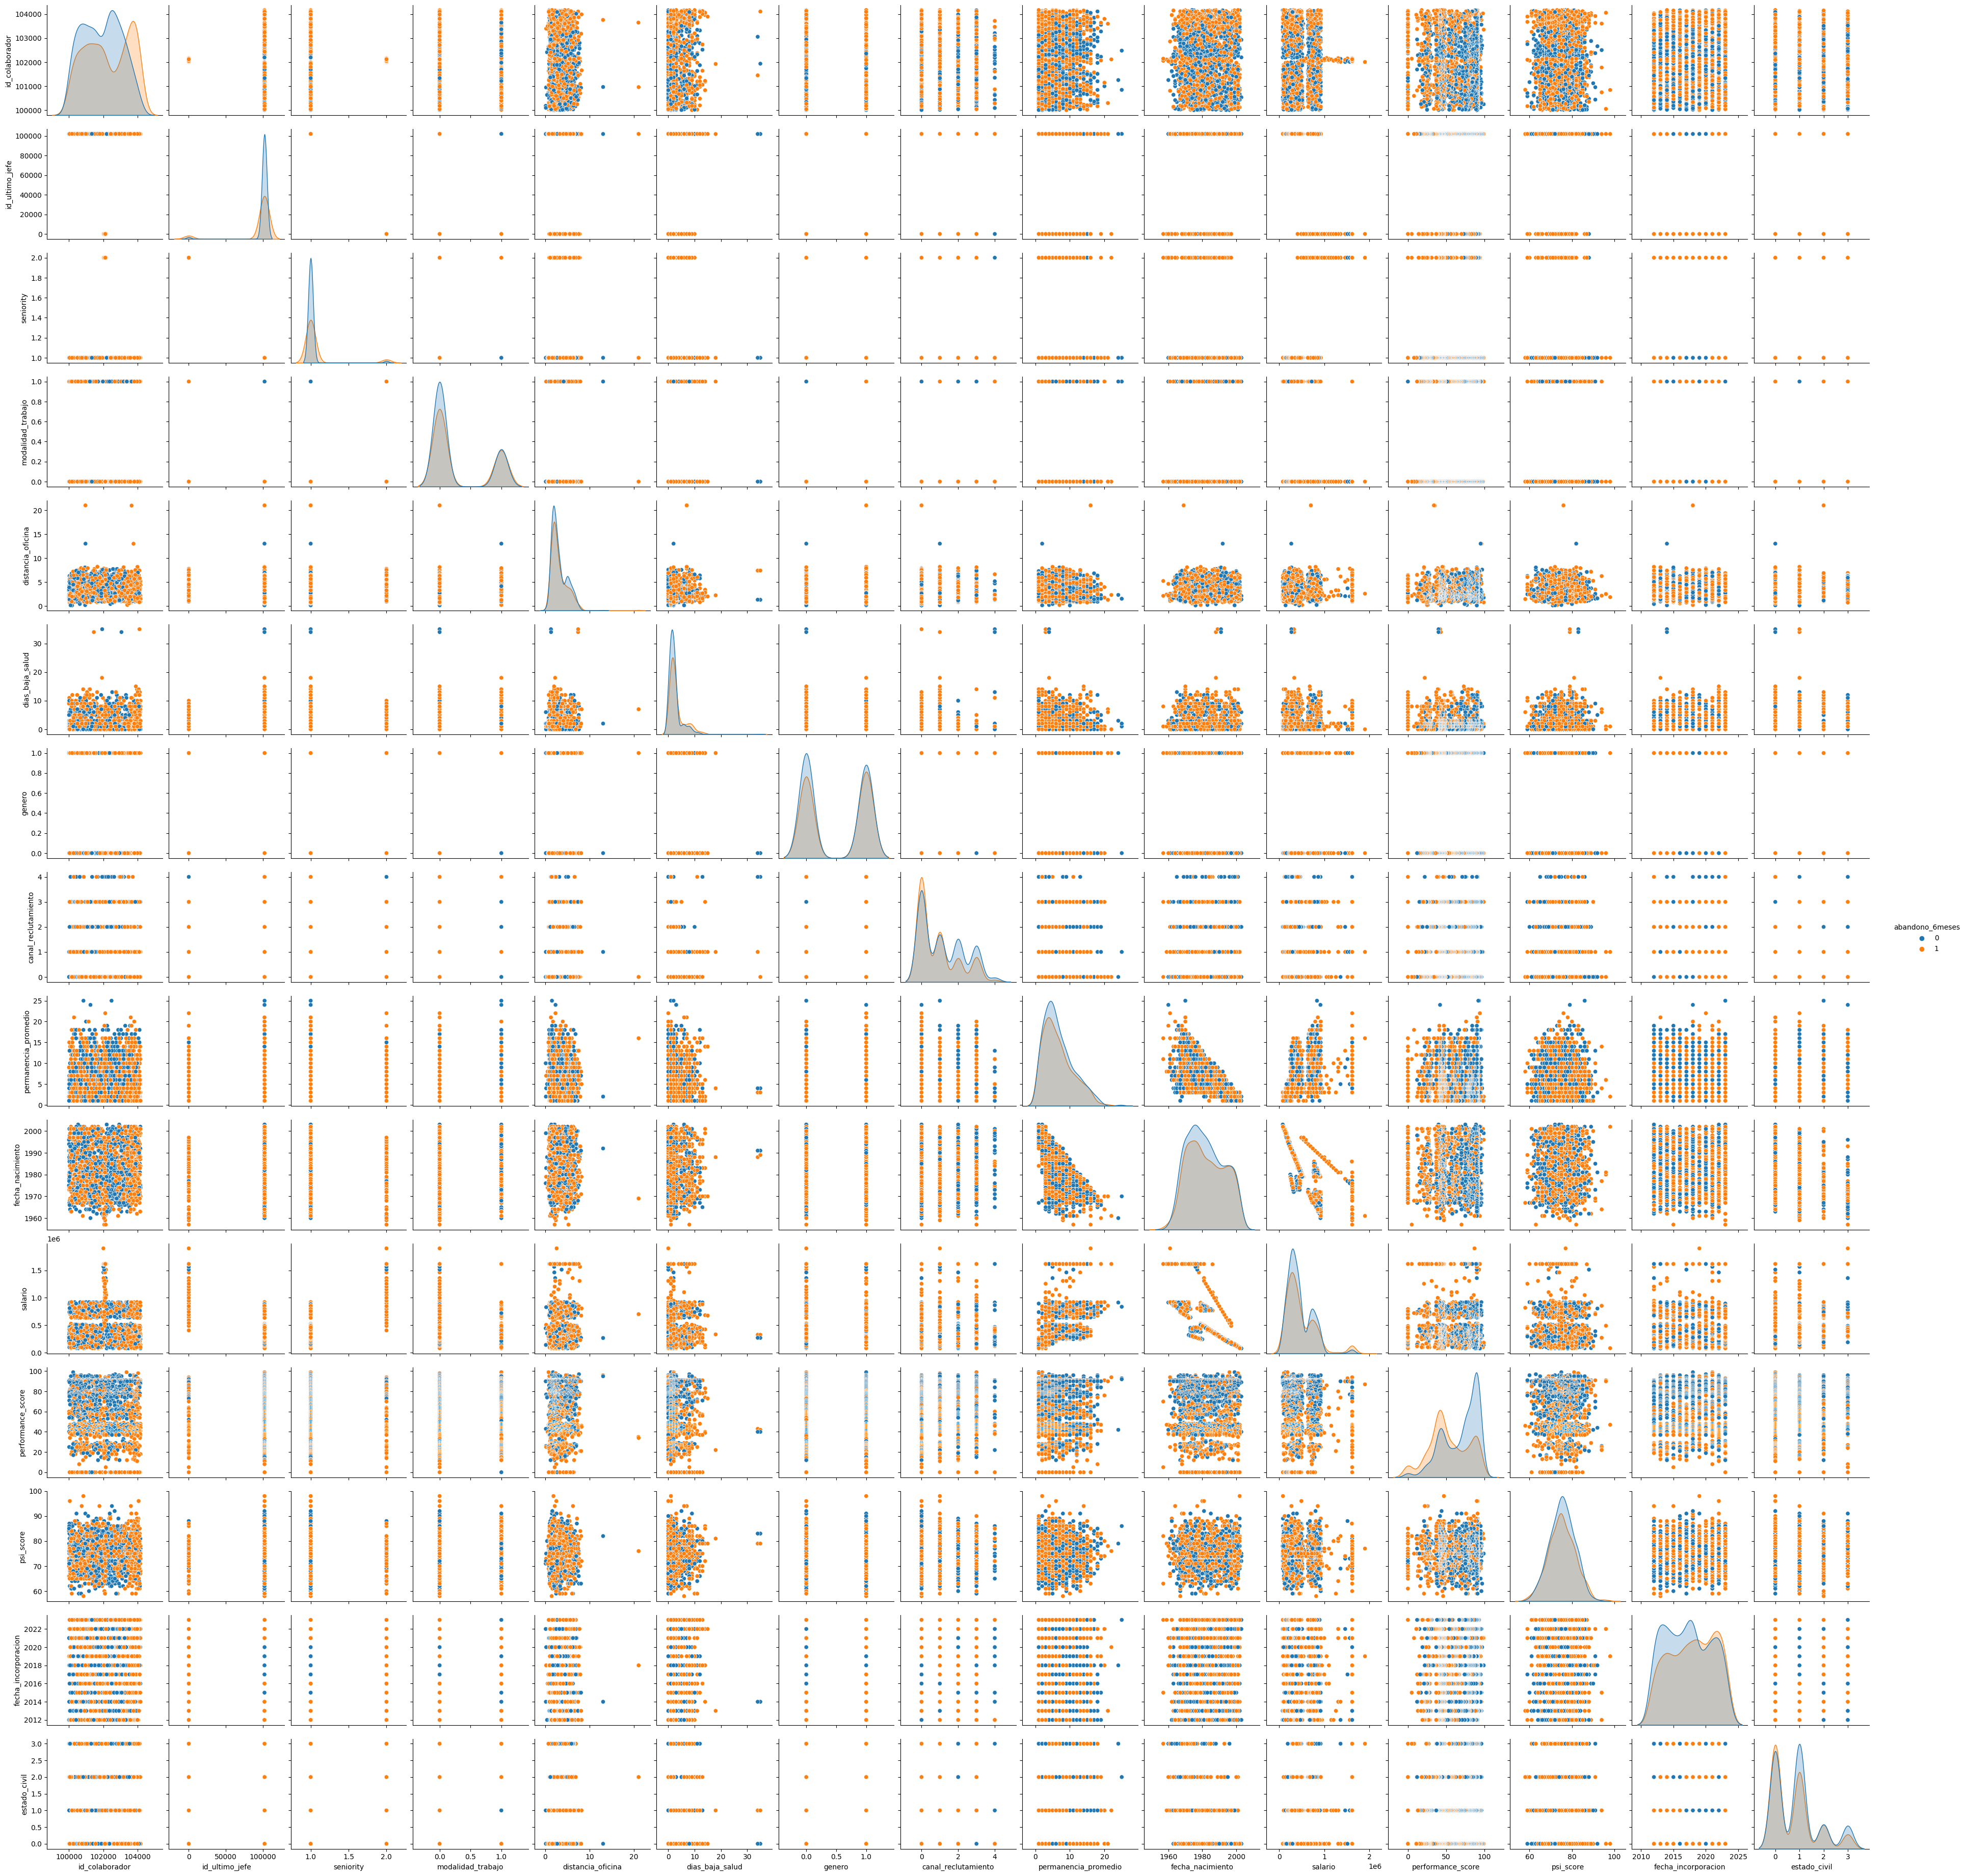

In [92]:

sns.pairplot(df, hue="abandono_6meses")






In [112]:
df_mod = df.dropna()

In [113]:
X = df_mod.drop(columns=["abandono_6meses", "id_colaborador", "id_ultimo_jefe", "genero", "canal_reclutamiento"])
Y = df_mod["abandono_6meses"]

In [114]:
X.shape

(2152, 11)

In [115]:
# mlp model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#pca 
from sklearn.decomposition import PCA
import umap.umap_ as umap

In [116]:
X = StandardScaler().fit_transform(X)
X.shape

(2152, 11)

In [117]:

model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, alpha=0.0001, solver='adam', random_state=21, tol=0.000000001)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Accuracy:  0.6751740139211136
[[150  73]
 [ 67 141]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       223
           1       0.66      0.68      0.67       208

    accuracy                           0.68       431
   macro avg       0.68      0.68      0.68       431
weighted avg       0.68      0.68      0.68       431



# TEST

In [147]:
df_test = pd.read_csv("../data/test_data.csv", sep=";")

In [148]:
df_test = df_test.fillna(0)

In [149]:
df_test["genero"] = df_test["genero"].replace("Mujer", 1).replace("Hombre", 0)
df_test["modalidad_trabajo"] = df_test["modalidad_trabajo"].replace("Presencial", 0).replace("Híbrida", 1)
df_test["fecha_nacimiento"] = pd.to_datetime(df_test["fecha_nacimiento"]).dt.year
df_test["fecha_incorporacion"] = pd.to_datetime(df_test["fecha_incorporacion"]).dt.year
df_test["estado_civil"] = df_test["estado_civil"].replace("Casado", 1).replace("Soltero", 0).replace("Divorciado", 2).replace("Viudo", 3)
df_test["canal_reclutamiento"] = df_test["canal_reclutamiento"].replace("Portal Web", 0).replace("Linkedin", 1).replace("Referidos", 2).replace("Ferias & Networking", 3).replace("Headhunter", 4)
X_test = df_test.drop(columns=["id_colaborador", "id_ultimo_jefe", "genero", "canal_reclutamiento"])

/tmp/ipykernel_37799/2890193487.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_test["fecha_nacimiento"] = pd.to_datetime(df_test["fecha_nacimiento"]).dt.year
/tmp/ipykernel_37799/2890193487.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_test["fecha_incorporacion"] = pd.to_datetime(df_test["fecha_incorporacion"]).dt.year


In [150]:
X_test = StandardScaler().fit_transform(X_test)

In [151]:
Y = model.predict(X_test)

In [152]:
# Join two columns 
result = pd.DataFrame({'ID': df_test["id_colaborador"], 'abandono_6meses': Y})

In [108]:
result.to_csv("../data/result.csv", index=False)